# Actividad Módulo 24 - Simulación
Definición de un modelo determinístico de un cálculo de costos: presupuesto simple con ítems, suma uno a uno
- Definición de distribuciones de probabilidad a las variables del modelo
- Ejecución de simulación aplicada al modelo con 5000 iteraciones
- Lectura e interpretación de resultados
- Visualización básica y conclusiones
- Análisis de sensibilidad con dos tipos de distribuciones diferentes
- Conclusiones finales

## Definición de un modelo determinísitico de un cálculop de costos
La empresa está considerando tomar un proyecto. Tienen un presupuesto para completar el proyecto de $10,000. Correrán simulaciones de los diferentes costos que tienen previstos con funciones de probabilidad que validaron expertos en el tema. Si la probabilidad de que el proyecto entre dentro de su presupuesto es de .60 o más, tomarán el proyecto, de lo contrario no lo realizarán. Los costos que tienen en cuenta son los siguentes:
- Costo de construcción
- Costo de materias primas
- Costo de planeación
- Costo de transporte
- Costo de mano de obra

El costo total del proyecto es la suma de los 5 costos mencionados anteriormente

In [1]:
import numpy as np
import matplotlib.pyplot as plt

presupuesto = 10000

In [2]:
# Definición de la función roll dice con las distribuciones que se encontraron para cada uno de los 
def roll_dice():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1900, scale=500)
    costo_transporte = np.random.triangular(1500,2000,2700)
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

In [3]:
# Ejecución de la simulación para 5000 iteraciones
roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice()))


In [4]:
print(f'Promedio de costos: {np.mean(costo_total):.2f}')
print(f'Desviación estándar de costos: {np.std(costo_total):.2f}')
print(f'Mediana de costos: {np.median(costo_total):.2f}')

Promedio de costos: 9999.10
Desviación estándar de costos: 686.31
Mediana de costos: 9988.25


## Insights 1:
- El promedio y la mediana de los costos totales son muy parecidos por lo que esperaríamos una distribución sin sesgos a ningún lado
- El promedio está prácticamente en la línea de los $10,000 que es justamente el presupuesto que se le asignó al proyecto. A partir de esto podemos inferir que la probabilidad de que el proyecto cueste $10,000 o menos será de aproximadamente el 50%
- Dada la probabilidad inferida y las específicaciones que nos dieron como límite para saber si aceptar el proyecto o no, parece que el proyecto no será aceptado

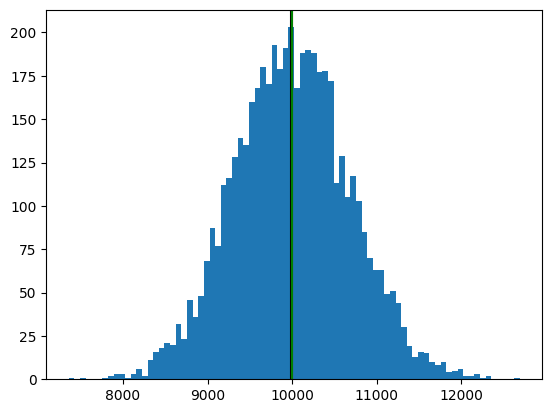

In [21]:
# Visualización básica
plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')


In [6]:
costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 50.7%


# Análisis de sensibilidad de los diferentes costos

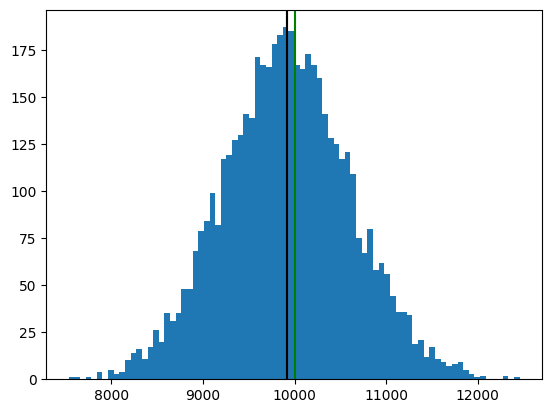

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 55.3%


In [30]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,1750,3000)   # Cambio de -250 en el valor más probable
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1900, scale=500)
    costo_transporte = np.random.triangular(1500,2000,2700)
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

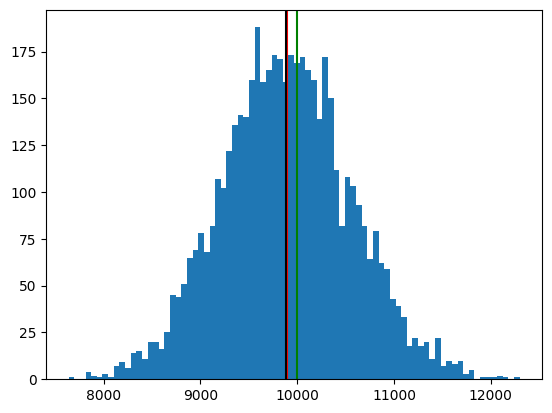

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 56.9%


In [31]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2000)           # Cambio de -250 en el valor más alto
    costo_planeacion = np.random.normal(loc=1900, scale=500)
    costo_transporte = np.random.triangular(1500,2000,2700)
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

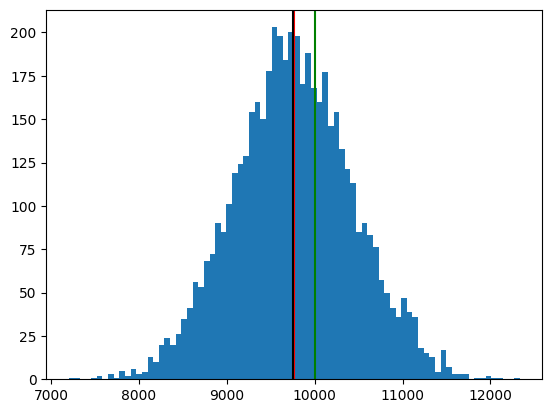

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 64.2%


In [33]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1650, scale=500)       # Cambio de -250 en el promedio de la distribución
    costo_transporte = np.random.triangular(1500,2000,2700)
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

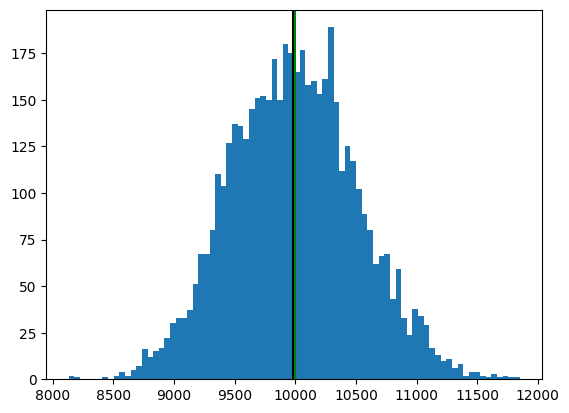

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 51.1%


In [36]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1900, scale=250)       # Cambio de -250 en la desviación estándar de la distribución
    costo_transporte = np.random.triangular(1500,2000,2700)
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

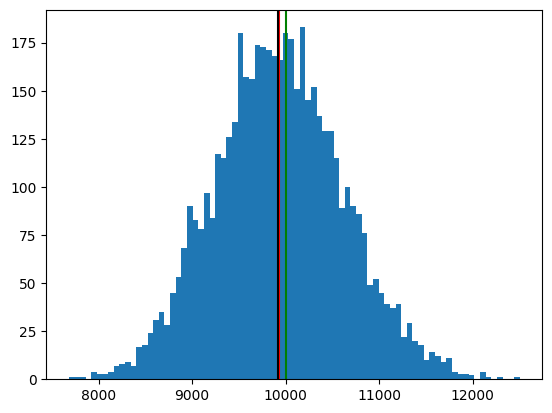

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 54.7%


In [37]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1900, scale=500)
    costo_transporte = np.random.triangular(1500,1750,2700)     # Cambio de -250 en el valor más probable
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

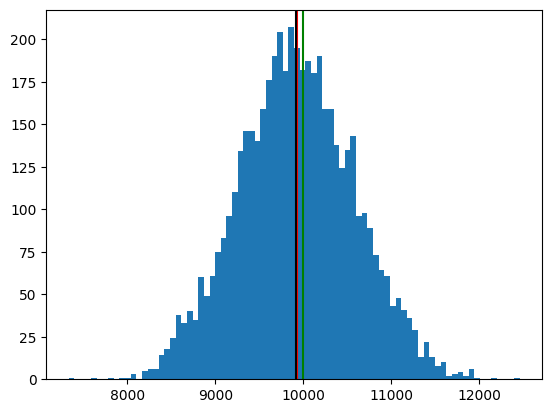

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 55.0%


In [38]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1900, scale=500)
    costo_transporte = np.random.triangular(1500,2000,2450)     # Cambio de -250 en el valor más alto
    consto_labor = np.random.uniform(1800,2200)

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

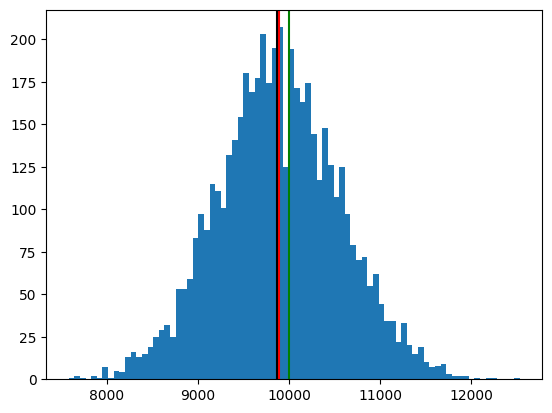

La probabilidad de que el proyecto salga dentro del presupuesto asignado es de 57.1%


In [39]:
def roll_dice_sens():
    costo_construccion = np.random.triangular(1500,2000,3000)
    costo_materias = np.random.uniform(1500,2250)
    costo_planeacion = np.random.normal(loc=1900, scale=500)
    costo_transporte = np.random.triangular(1500,2000,2700)     
    consto_labor = np.random.uniform(1800,1950)         # Cambio de -250 en el valor más alto

    return costo_construccion, costo_materias, costo_planeacion, costo_transporte, consto_labor 

roll_num = []
costo_total = []

for roll in range(5000):
    roll_num.append(roll)
    costo_total.append(sum(roll_dice_sens()))

plt.hist(costo_total, bins=80)
plt.axvline(np.mean(costo_total), color='r')
plt.axvline(np.median(costo_total), color='k')
plt.axvline(presupuesto, color='g')
plt.show()

costo_np = np.array(costo_total)
num_compliant = costo_np[costo_np <= 10000].__len__()
num_total = costo_np.__len__()
print(f'La probabilidad de que el proyecto salga dentro del presupuesto asignado es de {num_compliant/num_total * 100:.1f}%')

## Insights 2:
- Como se puede ver en el análisis de sensibilidad, el cambio que resultó en el mayor efecto hacia la probabilidad de que el proyecto entre dentro del presupuesto asignado, fue el cambio en el promedio del costo de planeación el cual presenta una distribución normal
- De hecho, con el cambio hecho, de reducir en 250 el promedio en la distribución del costo de planeación, el proyecto sería aceptado por la empresa puesto que ya presenta una probabilidad de 60% o superior de estar dentro del presupuesto asignado

## Conclusiones finales:
- La simulación es sumamente efectiva para crear una cantidad alta de escenarios dadas ciertas variables siempre y cuanto se conozca la distribución que siguen esas variables
- Conocer la distribución de las variabes es un tema completamente a parte puesto que se requiere de obtener suficientes muestras de las mismas y correr otro tipo de tests estadísticos para determinar cuál distribución es a la que más se asemejan los datos
- Todo el esfuerzo que requiere la obtención de datos y la realización de pruebas para la determinación de la distribución probabilística que siguen las variables puede o no valer la pena, dependiendo específicamente de cada caso, la disponibilidad de datos históricos, la dificultad de observación del evento que genera la variable que se está tratando de simular, entre otras cosas